In [2]:
import scipy.io
import numpy as np
import mne
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
participant_num = 2
data_path = "C:/Users/ssr17/Skybrain_neurotech/"
filename = f"Data_Design_Sub_{participant_num}.mat"
file_path = os.path.join(data_path, filename)
sfreq = 250

In [4]:
mat = scipy.io.loadmat(filename)
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Design_2_1_IE', 'Design_2_1_IG', 'Design_2_1_PU', 'Design_2_1_RIE', 'Design_2_1_RIG', 'Design_2_2_IE', 'Design_2_2_IG', 'Design_2_2_PU', 'Design_2_2_RIE', 'Design_2_2_RIG', 'Design_2_3_IE', 'Design_2_3_IG', 'Design_2_3_PU', 'Design_2_3_RIE', 'Design_2_3_RIG', 'Design_2_4_IE', 'Design_2_4_IG', 'Design_2_4_PU', 'Design_2_4_RIE', 'Design_2_4_RIG', 'Design_2_5_IE', 'Design_2_5_IG', 'Design_2_5_PU', 'Design_2_5_RIE', 'Design_2_5_RIG', 'Design_2_6_IE', 'Design_2_6_IG', 'Design_2_6_PU', 'Design_2_6_RIE', 'Design_2_6_RIG', 'Design_2_RST1', 'Design_2_RST2'])



=== Condition Summary (Channels, Samples, Duration,) ===
Condition  Mean_Channels  Total_Channels  Total_Samples  Total_Duration_s  Num_Recordings
       IE           63.0             378         206500             826.0               6
       IG           63.0             378         246500             986.0               6
       PU           63.0             378          63500             254.0               6
      RIE           63.0             378          40000             160.0               6
      RIG           63.0             378          44500             178.0               6
     RST1           63.0              63          41000             164.0               1
     RST2           63.0              63          36500             146.0               1

=== Individual Session Details ===
           Key Participant Session Condition  Channels  Samples  Duration_s
 Design_2_1_IE           2       1        IE        63    31000       124.0
 Design_2_1_IG           2       1

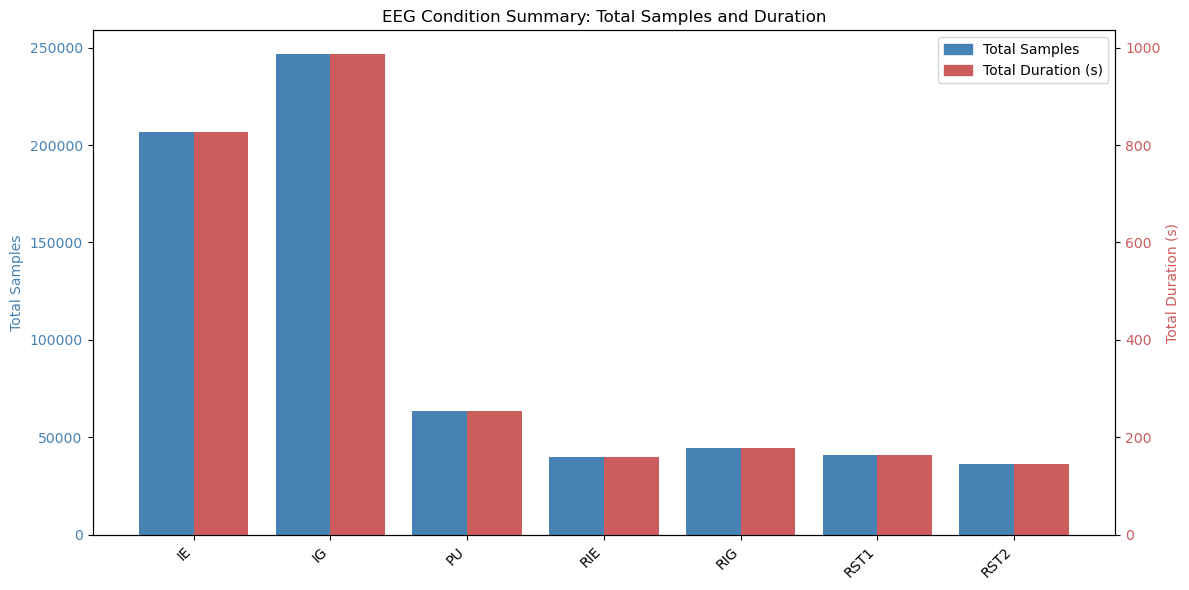

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


known_sfreq = 250

records = []
for key in mat.keys():
    if key.startswith('__'):
        continue
    parts = key.split('_')
    if len(parts) == 4:
        _, participant, session, condition = parts
    elif len(parts) == 3:
        _, participant, condition = parts
        session = None
    else:
        continue
    data = mat[key]
    n_channels, n_samples = data.shape
    duration = n_samples / known_sfreq
    sfreq = n_samples / duration

    records.append({
        'Key': key,
        'Participant': participant,
        'Session': session,
        'Condition': condition,
        'Channels': n_channels,
        'Samples': n_samples,
        'Duration_s': round(duration, 2),
        'Sampling_Rate_Hz': round(sfreq, 2)
    })

# Create DataFrame
df = pd.DataFrame(records)

# === Condition Summary ===
condition_summary = df.groupby('Condition').agg({
    'Channels': ['mean', 'sum'],
    'Samples': 'sum',
    'Duration_s': 'sum',
    'Key': 'count'
})

condition_summary.columns = ['Mean_Channels', 'Total_Channels', 'Total_Samples',
                             'Total_Duration_s', 'Num_Recordings']

condition_summary = condition_summary.round({
    'Mean_Channels': 2,
    'Total_Duration_s': 2,
}).reset_index()

# === Individual Session Details ===
individual_sessions = df[['Key', 'Participant', 'Session', 'Condition', 'Channels',
                          'Samples', 'Duration_s']]
individual_sessions = individual_sessions.sort_values(by=['Participant', 'Session', 'Condition'])

# === Print Summaries ===
print("\n=== Condition Summary (Channels, Samples, Duration,) ===")
print(condition_summary.to_string(index=False))
print("\n=== Individual Session Details ===")
print(individual_sessions.to_string(index=False))

# === Plot Total Samples and Duration ===
fig, ax1 = plt.subplots(figsize=(12, 6))
x = np.arange(len(condition_summary))
bar_width = 0.4

ax1.bar(x - bar_width/2, condition_summary['Total_Samples'], width=bar_width, color='steelblue')
ax1.set_ylabel('Total Samples', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

ax2 = ax1.twinx()
ax2.bar(x + bar_width/2, condition_summary['Total_Duration_s'], width=bar_width, color='indianred')
ax2.set_ylabel('Total Duration (s)', color='indianred')
ax2.tick_params(axis='y', labelcolor='indianred')

ax1.set_xticks(x)
ax1.set_xticklabels(condition_summary['Condition'], rotation=45, ha='right')
plt.title('EEG Condition Summary: Total Samples and Duration')

handles = [plt.Rectangle((0, 0), 1, 1, color='steelblue'),
           plt.Rectangle((0, 0), 1, 1, color='indianred')]
ax1.legend(handles, ['Total Samples', 'Total Duration (s)'], loc='upper right')

fig.tight_layout()
plt.show()


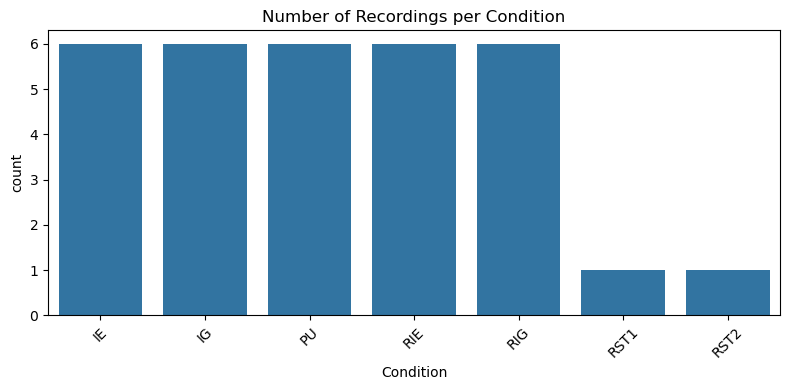

In [31]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Condition')
plt.title('Number of Recordings per Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

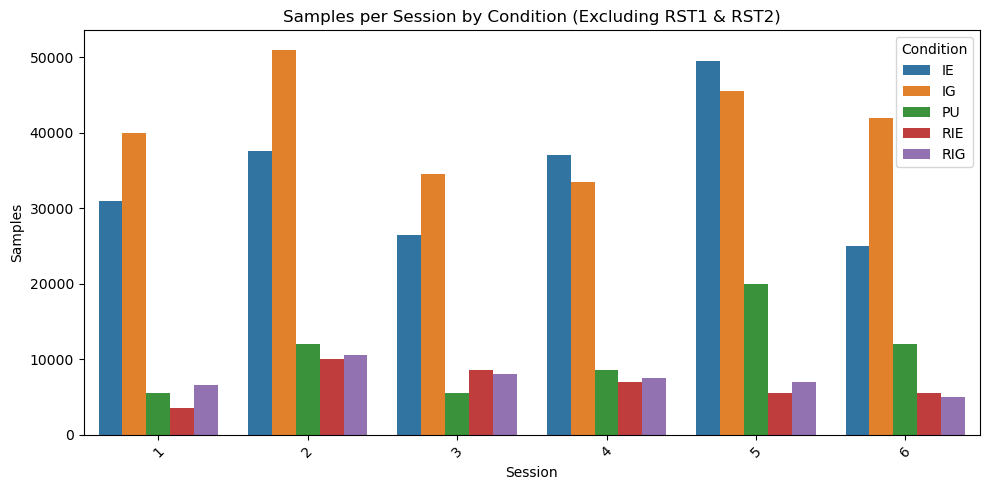

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = df[~df['Condition'].isin(['RST1', 'RST2'])]

plt.figure(figsize=(10, 5))
sns.barplot(data=df_filtered, x='Session', y='Samples', hue='Condition')
plt.title('Samples per Session by Condition (Excluding RST1 & RST2)')
plt.ylabel('Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


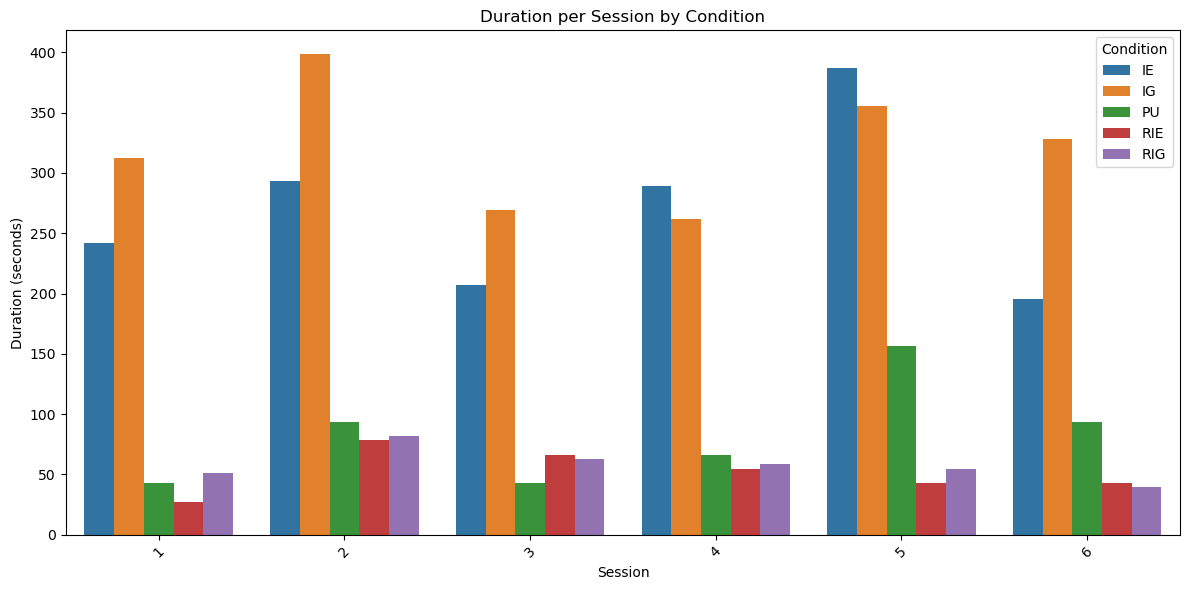

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


duration_df = df.dropna(subset=['Session']).copy()


duration_df['Session'] = duration_df['Session'].astype(str)

plt.figure(figsize=(12, 6))
sns.barplot(data=duration_df, x='Session', y='Duration_s', hue='Condition')

plt.title('Duration per Session by Condition')
plt.ylabel('Duration (seconds)')
plt.xlabel('Session')
plt.legend(title='Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
condition_name = 'Design_2_1_PU' 
eeg_data = mat[condition_name] 


In [10]:
n_channels = eeg_data.shape[0]
ch_names = [f'EEG {i+1}' for i in range(n_channels)]
print(f"Channels ({len(ch_names)}): {ch_names}")
print(f"Sampling rate (Hz): {sfreq}")

Channels (63): ['EEG 1', 'EEG 2', 'EEG 3', 'EEG 4', 'EEG 5', 'EEG 6', 'EEG 7', 'EEG 8', 'EEG 9', 'EEG 10', 'EEG 11', 'EEG 12', 'EEG 13', 'EEG 14', 'EEG 15', 'EEG 16', 'EEG 17', 'EEG 18', 'EEG 19', 'EEG 20', 'EEG 21', 'EEG 22', 'EEG 23', 'EEG 24', 'EEG 25', 'EEG 26', 'EEG 27', 'EEG 28', 'EEG 29', 'EEG 30', 'EEG 31', 'EEG 32', 'EEG 33', 'EEG 34', 'EEG 35', 'EEG 36', 'EEG 37', 'EEG 38', 'EEG 39', 'EEG 40', 'EEG 41', 'EEG 42', 'EEG 43', 'EEG 44', 'EEG 45', 'EEG 46', 'EEG 47', 'EEG 48', 'EEG 49', 'EEG 50', 'EEG 51', 'EEG 52', 'EEG 53', 'EEG 54', 'EEG 55', 'EEG 56', 'EEG 57', 'EEG 58', 'EEG 59', 'EEG 60', 'EEG 61', 'EEG 62', 'EEG 63']
Sampling rate (Hz): 128


In [48]:
def plot_eeg_condition(condition_name, mat, sfreq=250):

    print(f"\n Plotting for: {condition_name}")

    eeg_data = mat[condition_name]  
    eeg_data_uv = eeg_data  

    # Creating MNE Raw object
    ch_names = [f'EEG{i+1}' for i in range(eeg_data.shape[0])]
    info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
    raw = mne.io.RawArray(eeg_data_uv, info)

    # Printing amplitude range info
    print("Max EEG amplitude:", np.max(eeg_data))
    print("Min EEG amplitude:", np.min(eeg_data))
    print("Range:", np.ptp(eeg_data))

    # Plotting time series
    ts_fig = raw.plot(n_channels=63, duration=10, scalings='auto',
                      title=f'Time Series - {condition_name}', show=True)
    plt.show(block=False)

    # Plotting power spectral density (PSD)
    psd_fig = raw.plot_psd(fmax=40, average=True, picks='eeg',
                           spatial_colors=False, show=True)
    psd_fig.suptitle(f'PSD - {condition_name}', fontsize=14)
    plt.show(block=False)



 Plotting for: Design_2_RST1
Creating RawArray with float64 data, n_channels=63, n_times=41000
    Range : 0 ... 40999 =      0.000 ...   163.996 secs
Ready.
Max EEG amplitude: 3.721473375907474e-05
Min EEG amplitude: -5.177820381612055e-05
Range: 8.899293757519529e-05


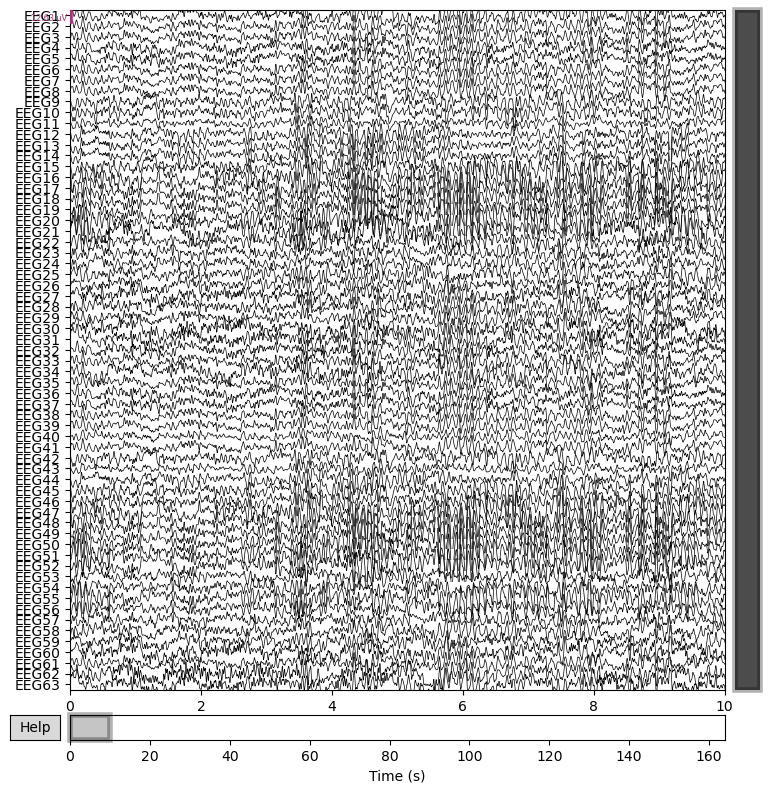

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


C:\Users\ssr17\anaconda3\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


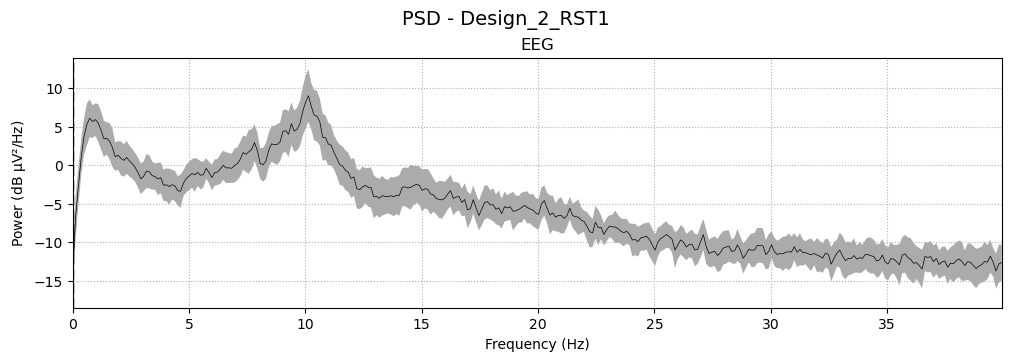

In [58]:
plot_eeg_condition("Design_2_RST1", mat, sfreq = 250)


 Plotting for: Design_2_1_IE
Creating RawArray with float64 data, n_channels=63, n_times=31000
    Range : 0 ... 30999 =      0.000 ...   123.996 secs
Ready.
Max EEG amplitude: 2.944711075198968e-05
Min EEG amplitude: -2.6752528490599838e-05
Range: 5.619963924258952e-05


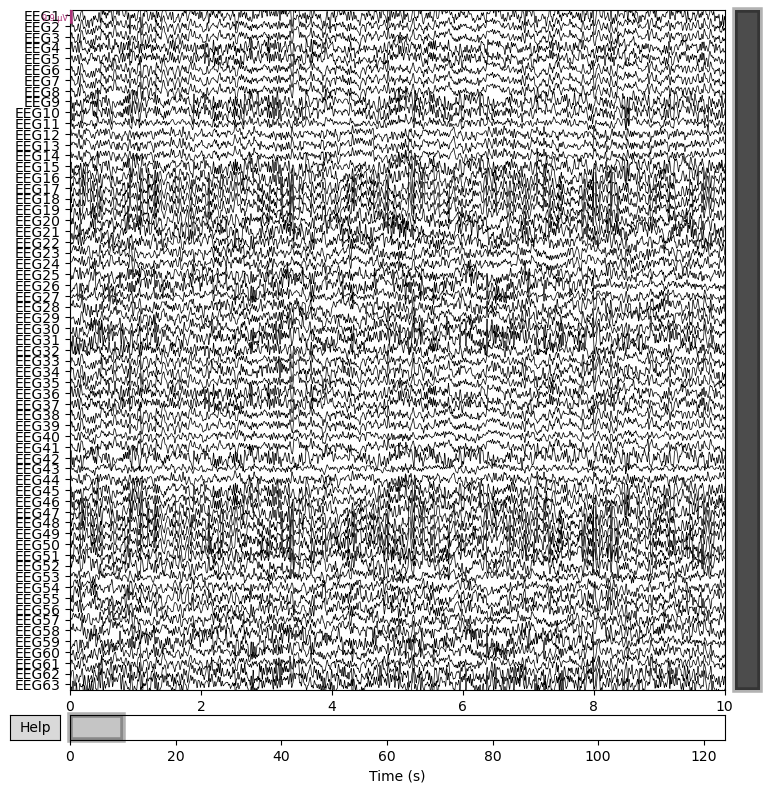

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


C:\Users\ssr17\anaconda3\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


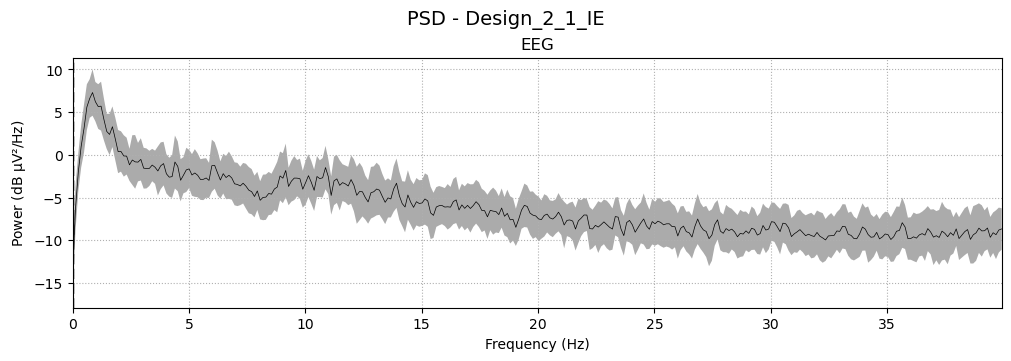

In [51]:
plot_eeg_condition("Design_2_1_IE", mat, sfreq = 250)


 Plotting for: Design_2_1_IG
Creating RawArray with float64 data, n_channels=63, n_times=40000
    Range : 0 ... 39999 =      0.000 ...   159.996 secs
Ready.
Max EEG amplitude: 2.4898990936563323e-05
Min EEG amplitude: -2.478938737264725e-05
Range: 4.968837830921057e-05


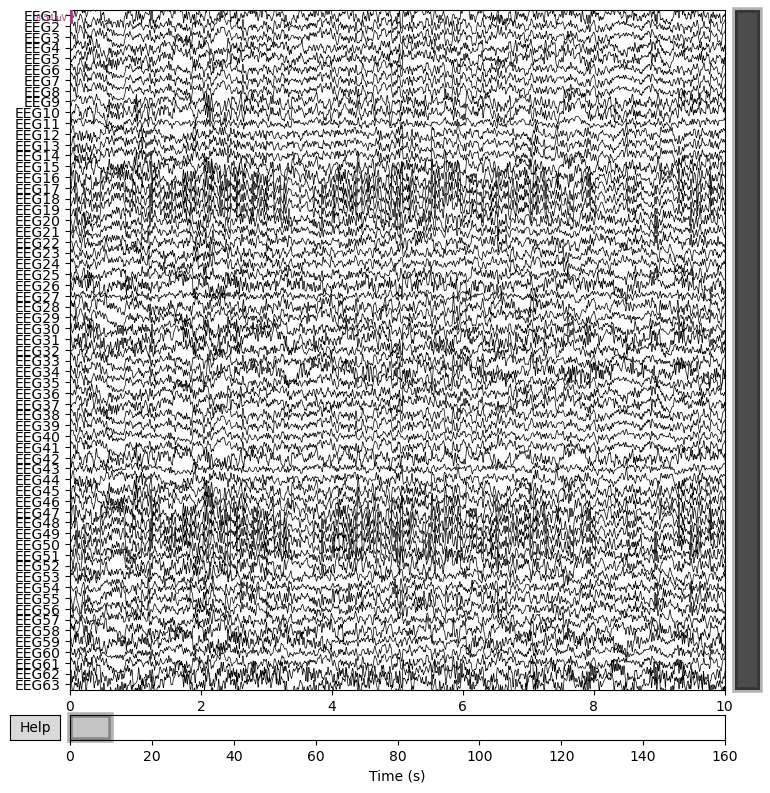

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


C:\Users\ssr17\anaconda3\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


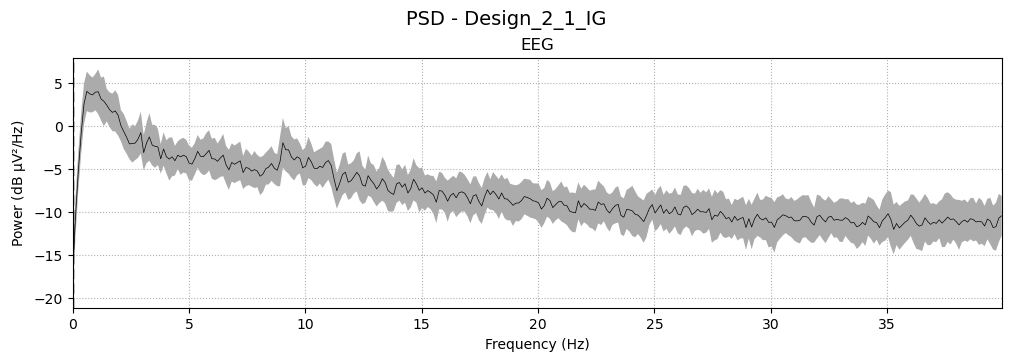

In [52]:
plot_eeg_condition("Design_2_1_IG", mat, sfreq = 250)